# Import packages

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.insert(1, 'C:\\Users\\pyann\\Dropbox (CEDIA)\\CPR\\Model')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Import dataset

In [2]:
from CPR import analysis

inputs = analysis.get_dataset()

# make dataset smaller for analysis
inputs = inputs.sample(500)

inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
2397,1986.0,female,55.0,post-secondary,80000.0,NaN,30000.000000,15000.000000,NaN,NaN,0.00,0.000000,NaN,NaN,0.0,0.0,NaN,NaN,0.6,0.04,NaN,NaN,NaN,NaN,1983.0,male,70.0,university,80000.0,NaN,12500.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,qc,375000.0,NaN,375000.0,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.006667,0.000000,2000.0,NaN,NaN,20000.0,NaN,184000.0,NaN,NaN,100.0,NaN,NaN,400.0,NaN,1733.0,NaN,NaN,61.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
376,1984.0,male,55.0,high school,90000.0,NaN,NaN,NaN,NaN,5000.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,0.0,40000.0,0.04,0.02,1972.0,female,60.0,university,50000.0,NaN,50000.000000,5000.0,NaN,NaN,0.246268,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.7,0.05,NaN,NaN,NaN,NaN,1,True,on,60000.0,250.0,60000.0,250.0,NaN,NaN,0.000000,1.000000,0.000000,0.010000,0.000000,NaN,NaN,8000.0,NaN,12000.0,NaN,NaN,NaN,NaN,NaN,300.0,NaN,1000.0,NaN,NaN,NaN,60.0,70.0,0,0.0,0,0.0,0,0,0.0,0.0
2241,1979.0,male,63.0,post-secondary,40000.0,NaN,114000.000000,100.000000,NaN,5000.000000,0.00,0.000000,NaN,0.000000,0.0,1000.0,NaN,0.0,0.6,0.05,NaN,NaN,NaN,NaN,1979.0,female,60.0,high school,70000.0,NaN,97222.222222,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,300.0,300.0,0.375000,0.062500,0.562500,0.014687,0.008437,NaN,1000.0,NaN,21000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,500.0,NaN,NaN,NaN,NaN,70.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
3493,1987.0,male,65.0,post-secondary,190000.0,NaN,114285.714286,NaN,NaN,NaN,0.05,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.7,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,qc,90000.0,NaN,90000.0,NaN,NaN,NaN,0.329897,0.113402,0.556701,0.014021,0.008969,NaN,NaN,NaN,14000.0,220000.0,NaN,NaN,NaN,NaN,NaN,NaN,400.0,700.0,NaN,NaN,NaN,70.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
2466,1971.0,male,68.0,university,52000.0,NaN,0.000000,3571.428571,NaN,6690.140845,0.00,0.017007,NaN,0.003521,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,240000.0,400000.0,240000.0,400000.0,NaN,NaN,0.246914,0.012346,0.740741,0.018593,0.014815,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN


# Run model
Deterministic model and stochastic model with 25 simulations

In [3]:
from CPR import main

res_deter = main.run_simulations(inputs, 1, non_stochastic=True,
                                 multiprocessing=True)
res_deter.summarize()


res_stoch = main.run_simulations(inputs, 20, non_stochastic=False,
                                 multiprocessing=True)
res_stoch.summarize()


total time: 13.679675579071045

Deterministic Model

Extra parameters:
multiprocessing: True

total time: 158.49664425849915

Stochastic Model, 20 simulations

Extra parameters:
multiprocessing: True


# Analyse results

## See output

In [4]:
res_deter.output.head()

,hh_index,sim,wage_bef,pension_bef,s_wage_bef,s_pension_bef,first_residence_bef,first_mortgage_balance_bef,disp_inc_bef,cons_bef,unreg_balance_bef,rrsp_balance_bef,tfsa_balance_bef,s_unreg_balance_bef,s_rrsp_balance_bef,s_tfsa_balance_bef,debt_payments_bef,wage_part,pension_part,s_wage_part,s_pension_part,first_residence_part,first_mortgage_balance_part,unreg_balance_part,rrsp_balance_part,tfsa_balance_part,s_unreg_balance_part,s_rrsp_balance_part,s_tfsa_balance_part,annuity_rrsp_part,annuity_rpp_dc_part,annuity_non_rrsp_part,s_annuity_rrsp_part,s_annuity_rpp_dc_part,s_annuity_non_rrsp_part,wage_after,pension_after,s_wage_after,s_pension_after,first_residence_after,first_mortgage_balance_after,debt_payments_after,annuity_rrsp_after,annuity_rpp_dc_after,annuity_non_rrsp_after,s_annuity_rrsp_after,s_annuity_rpp_dc_after,s_annuity_non_rrsp_after,disp_inc_after,cons_after,years_to_retire,factor,cpp_after,gis_after,oas_after,rpp_db_benefits_after,s_years_to_retire,s_factor,s_cpp_after,s_gis_after,s_oas_after,second_residence_bef,rpp_dc_bef,second_residence_part,rpp_dc_part,second_residence_after,s_rpp_db_benefits_after,business_bef,business_part,business_after,other_reg_balance_bef,other_reg_balance_part,s_rpp_dc_bef,s_rpp_dc_part,s_other_reg_balance_bef,s_other_reg_balance_part
0,2397,0,89530.313301,NaN,73561.197240,NaN,553244.298452,0.0,110108.977914,110108.977914,0.000000,33025.290602,16512.645301,0.000000,13760.537751,0.000000,0.000000,0.000000,NaN,70589.534437,NaN,562706.128476,0.0,0.000000,0.000000,0.0,0.0,13826.426515,0.0,1454.612392,0.0,727.306196,0.000000,0.0,0.000000,0.0,NaN,0.0,NaN,664803.279813,0.0,0.000000,1454.612392,0.000000,727.306196,987.027329,0.0,0.000000,66290.443501,66290.443501,23,22.703842,13809.550382,0.00000,7121.310000,13035.311738,35.0,14.763895,33911.734601,0.0,7121.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,376,0,100965.028515,NaN,43091.293174,NaN,71006.131877,NaN,92778.874553,92778.874553,4598.806941,NaN,0.000000,23168.916557,86189.495845,62663.801159,0.000000,102309.593396,NaN,0.000000,NaN,77289.294688,NaN,4421.442893,NaN,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,4874.122136,0.0,5523.244774,0.0,NaN,0.0,NaN,68818.569966,NaN,0.000000,0.000000,11827.213191,236.076220,4874.122136,0.0,5523.244774,149965.010829,149965.010829,21,22.047741,13172.715166,0.00000,4374.217128,NaN,14.0,20.284063,8141.893505,0.0,4085.091311,295.858883,120440.029407,322.038728,177759.077693,286.744042,143480.078179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2241,0,38348.697919,NaN,66640.021218,NaN,NaN,NaN,79419.736461,79368.145600,7418.492167,186931.472040,0.000000,0.000000,159420.115044,0.000000,51.590862,31253.520721,NaN,0.000000,NaN,NaN,NaN,8619.311270,222193.385311,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,8916.841887,0.0,0.000000,0.0,NaN,0.0,NaN,NaN,NaN,42.322864,12977.027314,0.000000,485.514419,8916.841887,0.0,0.000000,65687.951361,65645.628497,24,18.347437,10745.764885,0.00000,7121.310000,13193.305652,21.0,20.529152,12183.493245,0.0,7121.310000,NaN,NaN,NaN,NaN,NaN,NaN,406.471085,466.467367,464.448319,NaN,NaN,NaN,NaN,NaN,NaN
3,3493,0,210083.838591,NaN,NaN,NaN,137359.146942,NaN,107501.192907,98252.969150,160883.491155,244950.259833,223448.080903,NaN,NaN,NaN,9248.223757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,156869.927887,NaN,0.000000,21431.884624,0.000000,30390.989654,NaN,NaN,NaN,129524.999308,129524.999308,34,17.437279,25347.297290,0.00000,0.000000,110305.374207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2466,0,44840.654608,NaN,NaN,NaN,279248.695864,0.0,34535.813386,27117.336733,9451.552371,0.000000,13405.968677,NaN,NaN,NaN,7418.476654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,335557.811121,0.0,0.000000,0.000000,0.000000,2955.723747,NaN,NaN,NaN,26864.661621,26864.661621,21,15.518270,17452.062187,250.89464,7121.310000,NaN,NaN,NaN,NaN,NaN,NaN,465414.493107,NaN,NaN,NaN,559263

## Merge with input and check preparedness

In [5]:
res_deter.merge()
res_deter.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_deter.df_merged

print(f'percentage people prepared in sample: {df.prepared.mean() * 100}%')

percentage people prepared in sample: 77.8%


## RRI distribution

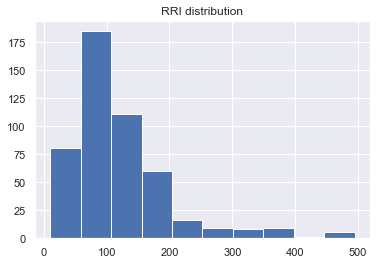

In [6]:
sns.set()
ax = df.rri[df.rri < 500].hist()
ax.set_title('RRI distribution')
plt.show()

## Risk
### Preparation rate at aggregate level

In [7]:
res_stoch.merge()
res_stoch.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_stoch.df_merged

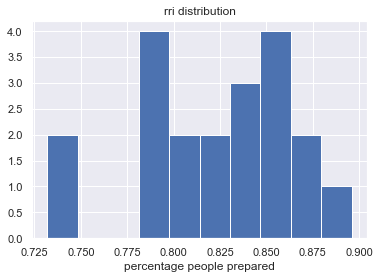

In [8]:
ax = df.groupby('sim')['prepared'].mean().hist()
ax.grid()
ax.set_title('rri distribution')
ax.set_xlabel('percentage people prepared')
ax.grid()
plt.show()

## Experiments
### Changes in returns

In [9]:
vars(res_deter.prices)

{'seed': 0,
 'inflation_rate': 0.02,
 'ret_equity_2018': -0.1041,
 'mu_equity': 0.0688,
 'rho_equity': 0.0,
 'sig_equity': 0.2179,
 'ret_dividends': 0.0417,
 'ret_bills_2018': -0.0029,
 'mu_bills': 0.0103,
 'rho_bills': 0.5756,
 'sig_bills': 0.06,
 'ret_bonds_2018': 0.0062,
 'mu_bonds': 0.0253,
 'rho_bonds': 0.3219,
 'sig_bonds': 0.1069,
 'ret_housing_2018': 0.0004,
 'mu_housing': 0.0161,
 'rho_housing': 0.21,
 'sig_housing': 0.0987,
 'price_rent_2018': 20.0,
 'mu_price_rent': 15.0,
 'rho_price_rent': 0.95,
 'sig_price_rent': 4.0,
 'corr_housing_price_rent': 0.6,
 'ret_business_2018': -0.1041,
 'mu_business': 0.0688,
 'rho_business': 0.0,
 'sig_business': 0.2179,
 'gr_rate_wage': 0.01,
 'rho_wage': 0.96235919,
 'sig_pers_wage': 0.050739054,
 'sig_trans_wage': 0.018554826,
 'adj_fact_annuities': 0.9,
 'ret_dividends_tsx': 0.028,
 'ret_bills': array([[0.017042  ],
        [0.02317441],
        [0.02672097],
        [0.02876795],
        [0.02994804],
        [0.03062791],
        [0.0310

In [10]:
factors = np.linspace(0, 2, 10)

l_prepared = []
for factor in factors:
    res = main.run_simulations(inputs, 1, non_stochastic=True,
                                     multiprocessing=True,
                                     mu_equity=factor * 0.0688,
                                     mu_bills=factor * 0.0103,
                                     mu_bonds=factor * 0.0253)
    res.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
    l_prepared.append(res.df_merged.prepared.mean())    


total time: 13.74373984336853

total time: 13.272350549697876

total time: 13.786296606063843

total time: 12.077508211135864

total time: 11.290198802947998

total time: 11.243653059005737

total time: 11.878348350524902

total time: 11.361733436584473

total time: 11.584015607833862

total time: 11.784288883209229


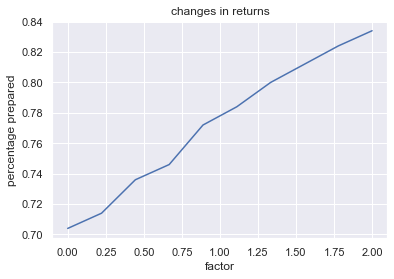

In [11]:
plt.plot(factors, l_prepared)
plt.title('changes in returns')
plt.xlabel('factor')
plt.ylabel('percentage prepared')
plt.show()

### Selling first residence

In [12]:
vars(res_deter.common)

{'nsim': 1,
 'non_stochastic': True,
 'base_year': 2018,
 'db_penalty_early_ret': 0.05,
 'rrsp_limit_2018': 26230.0,
 'rrsp_limit_2019': 26500.0,
 'rrsp_limit_2020': 27230.0,
 'rrsp_limit_2021': 27830.0,
 'gr_rrsp_limit': 0.03,
 'tfsa_limit_2018': 5500.0,
 'tfsa_limit_2019': 6000.0,
 'tfsa_limit_2020': 6000.0,
 'gr_tfsa_limit': 0.02,
 'gr_ympe': 0.03,
 'perc_cpp_2018': 0.25,
 'perc_cpp_2019': 0.262,
 'perc_cpp_2020': 0.274,
 'perc_cpp_2021': 0.29,
 'perc_cpp_2022': 0.31,
 'perc_cpp_2023': 0.33,
 'future_years': 110,
 'official_ret_age': 65,
 'min_age_cpp': 18,
 'max_ret_age': 75,
 'min_claim_age_cpp': 60,
 'max_claim_age_cpp': 70,
 'max_term_debts': 30,
 'age_cons_bef_ret': 55,
 'past_years': 50,
 'max_years_db': 35,
 'fee_rpp': 0.015,
 'max_age_no_rrif': 71,
 'frac_cap_gains': 0.5,
 'mix_bills_rpp': 0.0,
 'mix_bonds_rpp': 0.4,
 'mix_equity_rpp': 0.6,
 'perc_year_db': 0.02,
 'n_best_wages_db': 5,
 'db_offset': 600.0,
 'db_benefit_multiplier': 9.0,
 'db_minimum_age': 55,
 'db_ret_age_no

In [13]:
res_not_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                       multiprocessing=True,
                                       sell_first_resid=False)
res_not_selling.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_not_selling.df_merged

print(f'percentage people prepared without selling house: {df.prepared.mean() * 100}%')

res_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                   multiprocessing=True,
                                   sell_first_resid=True)
res_selling.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_selling.df_merged

print(f'percentage people prepared when selling house: {df.prepared.mean() * 100}%')


total time: 11.474915504455566
percentage people prepared without selling house: 77.8%

total time: 11.976813316345215
percentage people prepared when selling house: 77.4%


# Using CPR with other inputs

add link to documentation 
More info on the variables here: http://ire.hec.ca/en/wp-content/uploads/sites/3/2020/06/cpr-report-2020-final.pdf

In [14]:
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
2397,1986.0,female,55.0,post-secondary,80000.0,NaN,30000.000000,15000.000000,NaN,NaN,0.00,0.000000,NaN,NaN,0.0,0.0,NaN,NaN,0.6,0.04,NaN,NaN,NaN,NaN,1983.0,male,70.0,university,80000.0,NaN,12500.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,qc,375000.0,NaN,375000.0,NaN,NaN,NaN,0.000000,1.000000,0.000000,0.006667,0.000000,2000.0,NaN,NaN,20000.0,NaN,184000.0,NaN,NaN,100.0,NaN,NaN,400.0,NaN,1733.0,NaN,NaN,61.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
376,1984.0,male,55.0,high school,90000.0,NaN,NaN,NaN,NaN,5000.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,0.0,40000.0,0.04,0.02,1972.0,female,60.0,university,50000.0,NaN,50000.000000,5000.0,NaN,NaN,0.246268,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.7,0.05,NaN,NaN,NaN,NaN,1,True,on,60000.0,250.0,60000.0,250.0,NaN,NaN,0.000000,1.000000,0.000000,0.010000,0.000000,NaN,NaN,8000.0,NaN,12000.0,NaN,NaN,NaN,NaN,NaN,300.0,NaN,1000.0,NaN,NaN,NaN,60.0,70.0,0,0.0,0,0.0,0,0,0.0,0.0
2241,1979.0,male,63.0,post-secondary,40000.0,NaN,114000.000000,100.000000,NaN,5000.000000,0.00,0.000000,NaN,0.000000,0.0,1000.0,NaN,0.0,0.6,0.05,NaN,NaN,NaN,NaN,1979.0,female,60.0,high school,70000.0,NaN,97222.222222,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,300.0,300.0,0.375000,0.062500,0.562500,0.014687,0.008437,NaN,1000.0,NaN,21000.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,500.0,NaN,NaN,NaN,NaN,70.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
3493,1987.0,male,65.0,post-secondary,190000.0,NaN,114285.714286,NaN,NaN,NaN,0.05,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.7,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,qc,90000.0,NaN,90000.0,NaN,NaN,NaN,0.329897,0.113402,0.556701,0.014021,0.008969,NaN,NaN,NaN,14000.0,220000.0,NaN,NaN,NaN,NaN,NaN,NaN,400.0,700.0,NaN,NaN,NaN,70.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
2466,1971.0,male,68.0,university,52000.0,NaN,0.000000,3571.428571,NaN,6690.140845,0.00,0.017007,NaN,0.003521,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,240000.0,400000.0,240000.0,400000.0,NaN,NaN,0.246914,0.012346,0.740741,0.018593,0.014815,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750.0,NaN,NaN,65.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN


In [15]:
# saving copy of dataframe
inputs.iloc[0, :].to_frame().T.to_csv('my_inputs.csv', index=False)

In [16]:
my_inputs = pd.read_csv('my_inputs.csv')

In [17]:
my_res = main.run_simulations(my_inputs, 500, non_stochastic=False,
                              multiprocessing=True)
my_res.check_preparedness()
df = my_res.df_merged

df.prepared.value_counts(normalize=True)


total time: 10.687100887298584


False    1.0
Name: prepared, dtype: float64

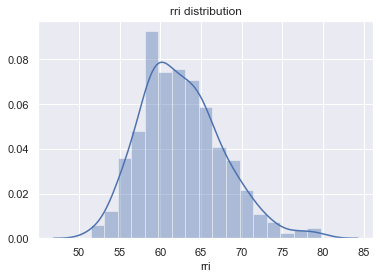

In [18]:
ax = sns.distplot(df.loc[df.rri<500, 'rri'])
ax.grid()
ax.set_title('rri distribution')
ax.grid()
plt.show()